In [1]:
import warnings
warnings.filterwarnings('ignore')

# Traverse file system using os.walk

In [2]:
import os
def walk_through_dir(dir_path):
    '''
    Walks through dir_path returning it's contents
    '''
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [3]:
# path where all the images are present
path = 'pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent'
walk_through_dir(path)

There are 2 directories and 0 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent
There are 3 directories and 0 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train
There are 0 directories and 508 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train/samosa
There are 0 directories and 529 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train/pizza
There are 0 directories and 538 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train/fried_rice
There are 3 directories and 0 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test
There are 0 directories and 182 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa
There are 0 directories and 179 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/pizza
There are 0 directories and 164 images in pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/fried_rice


# Setting up training and testing directory 

In [4]:
train_dir = path+'/train'
test_dir = path+'/test'

train_dir, test_dir

('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train',
 'pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test')

# Opening image with PIL --> Image

Image path : pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train/pizza/2952219.jpg
Image class : pizza
Image height : 512
Image width : 512


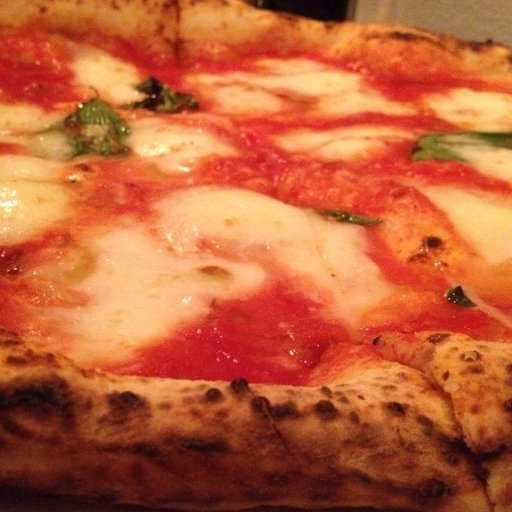

In [5]:
import random
from pathlib import Path
from PIL import Image

# random.seed(42)

# https://stackoverflow.com/questions/26124281/convert-a-str-to-path-type
# Get all image path
# glob is used to find files specifying pattern 
image_path_list = list(Path(path).glob('*/*/*.jpg'))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# path.parent gives the directories in which the image is
# path.stem gives the last file present in that tree (file)
# print(random_image_path.parent)
# print(random_image_path.stem)
# random class
random_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# print metadata
print(f'Image path : {random_image_path}')
print(f'Image class : {random_class}')
print(f'Image height : {img.height}')
print(f'Image width : {img.width}')
img

# Opening image with matplotlib --> `plt.imshow()`

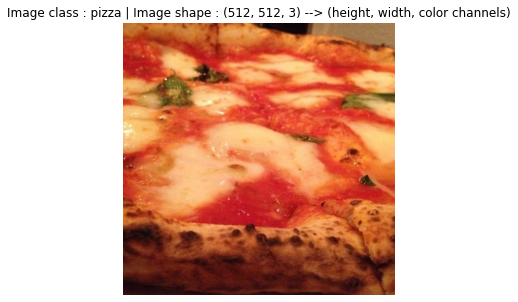

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(f'Image class : {random_class} | Image shape : {img_as_array.shape} --> (height, width, color channels)')
plt.axis(False)

# plt.xlabel(img.height)
# plt.ylabel(img.width)
plt.show()

# Transforming data
* Target to Tensor
* First --> `torch.utils.data.datasets` then to --> `torch.utils.data.DataLoader`

In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # flip the images randomly on horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch tensor
    transforms.ToTensor()
])

<Figure size 864x720 with 0 Axes>

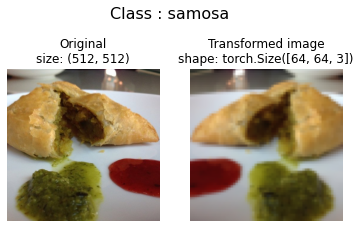

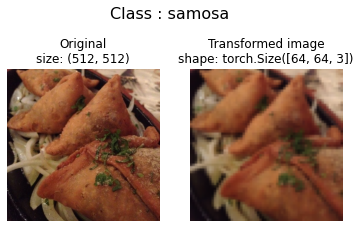

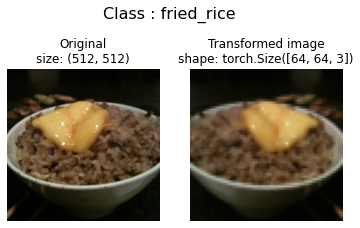

In [9]:
# https://github.com/mrdbourke/pytorch-deep-learning

def plot_transformed_images(image_paths, transform, 
                             n=3, seed=42):

    '''
    selects random images from images and 
    compares original and transformed image
    '''
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nsize: {f.size}')
            ax[0].axis(False)

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed image\nshape: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class : {image_path.parent.stem}', fontsize = 16)


plt.figure(figsize=(12, 10))
plot_transformed_images(image_paths = image_path_list,
                        transform = data_transform, n = 3, seed=42)

# Transforming data using pytorch's Compose() 

In [10]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # num_magnitude_bins tells about intensity while applying Trivial
    transforms.ToTensor()
    
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)), 
    transforms.ToTensor()
    
])

# Loading image using ImageFolder
* loading using --> `torchvision.datasets.ImageFolder`

In [11]:
train_data = datasets.ImageFolder(root = train_dir, 
                                  transform = train_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir, 
                                 transform = test_transform,
                                 target_transform = None)

In [12]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1575
     Root location: pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 525
     Root location: pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [13]:
# total classes we working on
class_names = train_data.classes
class_names

['fried_rice', 'pizza', 'samosa']

In [14]:
# classes with index values
class_dict = train_data.class_to_idx
class_dict

{'fried_rice': 0, 'pizza': 1, 'samosa': 2}

In [15]:
len(train_data), len(test_data)

(1575, 525)

In [16]:
img, label = train_data[0][0], train_data[0][1]
print(f'Image dtype: {img.dtype}')
print(f'Image dtype: {img.shape}')

Image dtype: torch.float32
Image dtype: torch.Size([3, 64, 64])


# To DataLoader - it makes data iterable 

In [17]:
train_dataloader = DataLoader(train_data, 
                              # using 32 as batch size (multiple of 8) and (it is proved to be a good number)
                              # https://twitter.com/ylecun/status/989610208497360896?lang=en
                              batch_size = 32, 
                              shuffle = True, 
                              # os.cpu_count() gives us total cpus
                              num_workers = os.cpu_count())

test_dataloader = DataLoader(test_data, 
                              batch_size = 32, 
                              shuffle = False,
                              num_workers = os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7621e1aedd20>,
 <torch.utils.data.dataloader.DataLoader at 0x7621e1aedc30>)

In [18]:
len(train_dataloader), len(test_dataloader)

(50, 17)

In [19]:
img, label = next(iter(train_dataloader))

print(f'Image shape : {img.shape} --> [B, C, H, W]')
print(f'Image shape : {label.shape}')

Image shape : torch.Size([32, 3, 64, 64]) --> [B, C, H, W]
Image shape : torch.Size([32])


In [62]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
import torch
from torch import nn
from tqdm.auto import tqdm
from timeit import default_timer as timer

# train_acc_list = []
# train_loss_list = []

def train_model(model: torch.nn.Module,
                dataloader: torch.utils.data.dataloader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn, epochs):

    train_start_time = timer()
    model.train()
    
    for i in tqdm(range(epochs)):
        train_loss, train_accuracy = 0, 0

        for batch, (X, y) in enumerate(dataloader):
            # predicting using the model
            y_pred = model(X)

            # calculating loss 
            loss = loss_fn(y_pred, y)

            # for every batch, accumulating only values to train_loss to get overall loss over all batches
            train_loss += loss.item()
            # train_loss_list.append(train_loss)

            # gradients to zero
            optimizer.zero_grad()

            # doing back propagation
            loss.backward()

            # Updating weights after doing backpropagation
            optimizer.step()

            # results give multiples values so only selecting the maximum one
            train_acc = accuracy_fn(y, y_pred.argmax(dim=1))
            train_accuracy += train_acc
            # train_acc_list.append(train_accuracy)


            # if batch % 400 == 0:
            #     print(f'Batches done : {batch * len(X)} / {len(dataloader.dataset)}')

        train_loss = train_loss / len(dataloader)
        train_accuracy = train_accuracy/len(dataloader)

        print(f'\nEpoch : {i} | train accuracy : {train_acc} | train loss : {loss}')

    train_end_time = timer() - train_start_time
    print(f'\ntrain ended in : {train_end_time}')

In [21]:
# test_acc_list = []
# test_loss_list = []

def test_model(model: torch.nn.Module,
               dataloader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    test_loss, test_accuracy = 0, 0

    # putting model to evaluation mode to speed up prediction
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in dataloader:
            test_pred = model(X_test)
            loss = loss_fn(test_pred, y_test)
            test_loss = test_loss + loss
            # test_loss_list.append(test_loss)
            test_acc = accuracy_fn(y_test, test_pred.argmax(dim=1))
            test_accuracy = test_accuracy + test_acc
            # test_acc_list.append(test_accuracy)

        test_loss /= len(dataloader)
        test_accuracy /= len(dataloader)
        print(f'test accuracy : {test_accuracy} | test loss : {test_loss}\n')

    # return {'model_name' : model.__class__.__name__,
    #        'model_loss' : loss_fn.item(),
    #        'model_accuracy' : test_accuracy}

In [22]:
class foodClassifier(nn.Module):

    def __init__(self, input_shape: int,
                       hidden_units: int,
                       output_shape: int):
        super().__init__()

        # Sequential is helpful in carrying out operation in a sequence
        self.conv_block = nn.Sequential(

            # input shapes
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,

                      # this is filter we use to extract different parts in a image
                      kernel_size = 2,

                      # stride tells how to move matrix on a image
                      stride = 2,

                      # adds a layer 
                      padding = 0),

            # relu helps us learn non-linear patterns
            nn.ReLU(),

            # Max pool is used to get important features.
            nn.MaxPool2d(kernel_size = 2, stride = 1),

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            # print after every block, note the shape and multiply values with hidden units to get correct matrix values
            nn.Linear(in_features = hidden_units*31*31, out_features = output_shape)
        )

    # When we use nn.Module, it is mandatory to overwrite forward method.
    def forward(self, x):
         x = self.conv_block(x)
         # print(f'Shape after conv_block{x.shape}')
         x = self.classifier(x)
         return x

In [23]:
food_classifier_0 = foodClassifier(input_shape = 3,
                                   hidden_units = 15, 
                                   output_shape = len(class_names))

food_classifier_0

foodClassifier(
  (conv_block): Sequential(
    (0): Conv2d(3, 15, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=14415, out_features=3, bias=True)
  )
)

In [24]:
# Cross Entropy loss is used for multi-class classification 
loss_1 = nn.CrossEntropyLoss()

# AdamW optimizer
optim_1 = torch.optim.AdamW(food_classifier_0.parameters(), lr = 0.001)

In [25]:
from helper_functions import accuracy_fn

torch.manual_seed(42)

train_model(food_classifier_0,
            train_dataloader,
            loss_1,
            optim_1,
            accuracy_fn, 25)

  0%|          | 0/25 [00:00<?, ?it/s]


Epoch : 0 | train accuracy : 28.57142857142857 | train loss : 1.1764421463012695

Epoch : 1 | train accuracy : 71.42857142857143 | train loss : 0.7688500285148621

Epoch : 2 | train accuracy : 57.14285714285714 | train loss : 0.9232125878334045

Epoch : 3 | train accuracy : 42.857142857142854 | train loss : 1.1164807081222534

Epoch : 4 | train accuracy : 100.0 | train loss : 0.5573175549507141

Epoch : 5 | train accuracy : 71.42857142857143 | train loss : 0.8421648144721985

Epoch : 6 | train accuracy : 57.14285714285714 | train loss : 1.336064338684082

Epoch : 7 | train accuracy : 71.42857142857143 | train loss : 0.7911509871482849

Epoch : 8 | train accuracy : 71.42857142857143 | train loss : 0.7785615921020508

Epoch : 9 | train accuracy : 57.14285714285714 | train loss : 0.9190545082092285

Epoch : 10 | train accuracy : 71.42857142857143 | train loss : 0.7840324640274048

Epoch : 11 | train accuracy : 42.857142857142854 | train loss : 0.8839531540870667

Epoch : 12 | train accur

In [26]:
test_model(food_classifier_0, 
           test_dataloader, 
           loss_1, accuracy_fn)

test accuracy : 69.89536199095022 | test loss : 0.7308657169342041



In [27]:
import pathlib
from pathlib import Path

# Get all test data paths
print(f"[INFO] Finding all filepaths ending with '.jpg' in directory: {test_dir}")
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[:5]

[INFO] Finding all filepaths ending with '.jpg' in directory: pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test


[PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/3312541.jpg'),
 PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/61410.jpg'),
 PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/3610746.jpg'),
 PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/2591040.jpg'),
 PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/1248504.jpg')]

In [28]:
from PIL import Image
from timeit import default_timer as timer 
from tqdm.auto import tqdm
from typing import List, Dict
import torchvision

def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

    # 2. Create an empty list to store prediction dictionaires
    pred_list = []

        # 3. Loop through target paths
    for path in tqdm(paths):
        
        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name
        
        # 6. Start the prediction timer
        start_time = timer()
        
        # 7. Open image path
        img = Image.open(path)
        
        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device) 
        
        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()

        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample 
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on) 
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class
            
            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)


                # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)
    
    # 15. Return list of prediction dictionaries
    return pred_list

In [29]:
# Make predictions across test dataset with EffNetB2
model_pred = pred_and_store(paths=test_data_paths,
                                          model=food_classifier_0,
                                          transform=test_transform,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU 

  0%|          | 0/525 [00:00<?, ?it/s]

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [30]:
model_pred[:3]

[{'image_path': PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/3312541.jpg'),
  'class_name': 'samosa',
  'pred_prob': 0.6541,
  'pred_class': 'samosa',
  'time_for_pred': 0.1663,
  'correct': True},
 {'image_path': PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/61410.jpg'),
  'class_name': 'samosa',
  'pred_prob': 0.4366,
  'pred_class': 'samosa',
  'time_for_pred': 0.0142,
  'correct': True},
 {'image_path': PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/3610746.jpg'),
  'class_name': 'samosa',
  'pred_prob': 0.737,
  'pred_class': 'samosa',
  'time_for_pred': 0.0123,
  'correct': True}]

In [31]:
import pandas as pd

model_test_pred_df = pd.DataFrame(model_pred)
# tinyvgg_test_pred_df[tinyvgg_test_pred_df['correct'] == True].shape
model_test_pred_df.sample(4)

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
348,pizza_friedrice_samosa/pizza_friedrice_samosa_...,pizza,0.6083,fried_rice,0.0071,False
419,pizza_friedrice_samosa/pizza_friedrice_samosa_...,fried_rice,0.6010,fried_rice,0.0172,True
159,pizza_friedrice_samosa/pizza_friedrice_samosa_...,samosa,0.5821,samosa,0.0058,True
375,pizza_friedrice_samosa/pizza_friedrice_samosa_...,fried_rice,0.5044,fried_rice,0.0057,True


In [32]:
model_test_pred_df['correct'].value_counts()

correct
True     370
False    155
Name: count, dtype: int64

In [33]:
y_preds = []
food_classifier_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = 'making predictions'):
    y_logits = food_classifier_0(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:5]

making predictions:   0%|          | 0/17 [00:00<?, ?it/s]

tensor([1, 0, 2, 0, 0])

In [34]:
import numpy as np
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

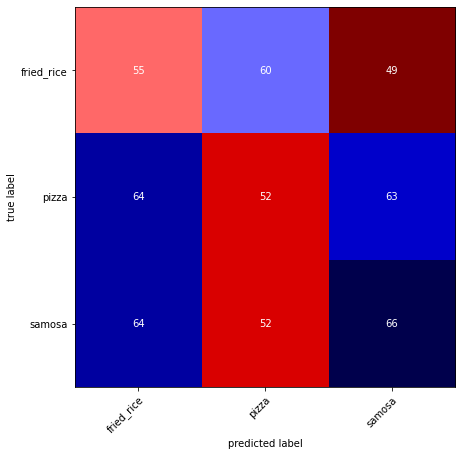

In [35]:
confmat = ConfusionMatrix(task="multiclass", num_classes = 3)
cm = confmat(y_pred_tensor, torch.tensor(test_data.targets))

fig, ax = plot_confusion_matrix(conf_mat = cm.numpy(),
                                class_names = class_names,
                                figsize=(10, 7), cmap = 'seismic_r')

In [36]:
model_test_pred_df['class_name'].value_counts()

class_name
samosa        182
pizza         179
fried_rice    164
Name: count, dtype: int64

# Tiny VGG Model

In [37]:
class foodClassifier_2(nn.Module):
    '''
    Model architecture which replicates TinyVGG
    '''

    def __init__(self, input_shape: int, 
                hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units, 
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*16*16, 
                      out_features = output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'Output shape of conv_block_1 {x.shape}')
        x = self.conv_block_2(x)
        # print(f'Output shape of conv_block_2 {x.shape}')
        x = self.classifier(x)
        # print(f'Output shape of classifier {x.shape}')
        return x

In [38]:
tinyVgg_classifier = foodClassifier_2(input_shape = 3,
                                      hidden_units = 15,
                                      output_shape = len(class_names))
tinyVgg_classifier

foodClassifier_2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3840, out_features=3, bias=True)
  )
)

In [39]:
loss_2 = nn.CrossEntropyLoss()
optim_2 = torch.optim.AdamW(tinyVgg_classifier.parameters(), lr = 0.001)

In [40]:
train_model(tinyVgg_classifier, train_dataloader, loss_2, optim_2, accuracy_fn, 25)

  0%|          | 0/25 [00:00<?, ?it/s]


Epoch : 0 | train accuracy : 28.57142857142857 | train loss : 1.0966912508010864

Epoch : 1 | train accuracy : 28.57142857142857 | train loss : 1.1317951679229736

Epoch : 2 | train accuracy : 85.71428571428571 | train loss : 0.908240020275116

Epoch : 3 | train accuracy : 57.14285714285714 | train loss : 0.8734809160232544

Epoch : 4 | train accuracy : 28.57142857142857 | train loss : 0.9875245690345764

Epoch : 5 | train accuracy : 57.14285714285714 | train loss : 1.22866952419281

Epoch : 6 | train accuracy : 57.14285714285714 | train loss : 0.9955715537071228

Epoch : 7 | train accuracy : 57.14285714285714 | train loss : 0.7841736078262329

Epoch : 8 | train accuracy : 42.857142857142854 | train loss : 0.940841794013977

Epoch : 9 | train accuracy : 42.857142857142854 | train loss : 0.8827263116836548

Epoch : 10 | train accuracy : 71.42857142857143 | train loss : 0.6879000067710876

Epoch : 11 | train accuracy : 57.14285714285714 | train loss : 0.9068880677223206

Epoch : 12 | tr

In [41]:
test_model(tinyVgg_classifier, test_dataloader, loss_2, accuracy_fn)

test accuracy : 77.22002262443438 | test loss : 0.5622389912605286



In [42]:
import gradio as gr

In [48]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:

    start_time = timer()
    # Transform the target image and add a batch dimension
    img = test_transform(img).unsqueeze(0)

    food_classifier_0.eval()
    with torch.inference_mode():
        pred_probs = torch.softmax(tinyVgg_classifier(img), dim=1)

    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    pred_time = round(timer() - start_time, 5)
    
    return pred_labels_and_probs, pred_time

In [49]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/fried_rice/1273788.jpg

Prediction label and probability dictionary: 
{'fried_rice': 0.3595975339412689, 'pizza': 0.1126474067568779, 'samosa': 0.527755081653595}
Prediction time: 0.02341 seconds


In [50]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/2620934.jpg'],
 ['pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/917040.jpg'],
 ['pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/103689.jpg']]

In [51]:
# Make predictions across test dataset with EffNetB2
tinyvgg_pred = pred_and_store(paths=test_data_paths,
                                          model=tinyVgg_classifier,
                                          transform=test_transform,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU 
tinyvgg_pred[:2]

  0%|          | 0/525 [00:00<?, ?it/s]

[{'image_path': PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/3312541.jpg'),
  'class_name': 'samosa',
  'pred_prob': 0.6858,
  'pred_class': 'samosa',
  'time_for_pred': 0.0516,
  'correct': True},
 {'image_path': PosixPath('pizza_friedrice_samosa/pizza_friedrice_samosa_70_percent/test/samosa/61410.jpg'),
  'class_name': 'samosa',
  'pred_prob': 0.8465,
  'pred_class': 'samosa',
  'time_for_pred': 0.0252,
  'correct': True}]

In [53]:
import gradio as gr

# Create title, description and article strings
title = "Tiny FoodVision"
description = "An TInyVGG computer vision model to classify images of food as pizza, samosa or fried rice."
article = "https://poloclub.github.io/cnn-explainer/"

# Create the Gradio demo
demo = gr.Interface(fn = predict, # mapping function from input to output
                    inputs = gr.Image(type="pil"), # what are the inputs?
                    outputs = [gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples = example_list, 
                    title = title,
                    description = description,
                    article = article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [54]:
tinyVgg_preds = []
food_classifier_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = 'making predictions'):
    y_logits = tinyVgg_classifier(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    tinyVgg_preds.append(y_pred)

tinyVgg_pred_tensor = torch.cat(y_preds)
tinyVgg_pred_tensor[:5]

making predictions:   0%|          | 0/17 [00:00<?, ?it/s]

tensor([1, 0, 2, 0, 0])

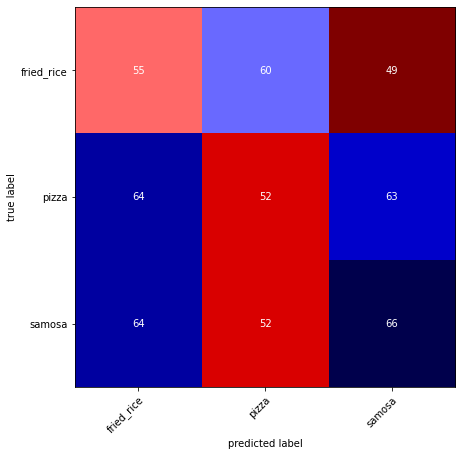

In [55]:
confmat = ConfusionMatrix(task="multiclass", num_classes = 3)
cm = confmat(tinyVgg_pred_tensor, torch.tensor(test_data.targets))

fig, ax = plot_confusion_matrix(conf_mat = cm.numpy(),
                                class_names = class_names,
                                figsize=(10, 7), cmap = 'seismic_r')

In [61]:
from torchmetrics.classification import MulticlassPrecision
mcp = MulticlassPrecision(num_classes=3)
mcp(tinyVgg_pred_tensor, torch.tensor(test_data.targets))

tensor(0.3295)